## **Plotting**

A Jupyter notebook talking about the high-level interface to plotting in PHOEBE. This roughly follows the given tutorial provided at https://phoebe-project.org/docs/2.4/.

### Setup

The typical setup of these tutorials, but the `%matplotlib inline` line has been added so that graphs can be plotted in interactive mode.

In [1]:
%matplotlib inline

In [ ]:
#!pip install phoebe

In [3]:
import phoebe as phb
from phoebe import u
import numpy as np
import matplotlib.pyplot as plt

In [4]:
logger = phb.logger()
bSystem = phb.default_binary()

Let's also generate some fake observations to model.

In [5]:
bSystem.add_dataset(
    'lc',
    compute_phases = phb.linspace(0, 1, 101),
    dataset = 'lc01'
)
bSystem.run_compute(irrad_method='none')

times = bSystem['times@model'].get_value()
fluxes = bSystem['fluxes@model'].get_value() + 0.01 * np.random.normal(size=times.shape) # Add some random noise
sigmas = np.ones_like(times) * 0.05

100%|██████████| 101/101 [00:00<00:00, 141.17it/s]


And now generate a synthetic system to attach our generated 'observations' to and run the model88888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888888.44

In [6]:
# Setup the system
bSystem = phb.default_binary()
bSystem['q'] = 0.8
bSystem['ecc'] = 0.1
bSystem['incl@orbit'] = 80
bSystem['irrad_method'] = 'none'

# Add datasets
bSystem.add_dataset(
    'orb',
    compute_times=phb.linspace(0, 4, 1000),
    dataset='orb01',
    component=['primary','secondary']
)
bSystem.add_dataset(
    'lc',
    times=times,
    fluxes=fluxes,
    sigmas=sigmas,
    dataset='lc01'
)

# Forward model
bSystem.run_compute(irrad_method='none')

100%|██████████| 1100/1100 [00:05<00:00, 218.09it/s]


<ParameterSet: 17 parameters | kinds: orb, lc>

### Showing and Saving Plots

In a IPython/Jupyter notebook, calling plot will display the plot below the cell. In a normal python environment, you can:
- Call `bSystem.show` or `bSystem.savefig` after calling plot.
- Use the returned autofig and matplotlib figures.
- Pass `show=True` to the plot method.
- Pass `save='filename'` to the plot method.

### Default Plots

Calling `bSystem.plot` on a Bundle/ParameterSet without any arguments will plot a series of subplots that are built upon that Bundle/ParameterSet. For example, calling it on `bSystem` now will plot both a light curve and an orbital plot due to having a lc and orb dataset

Tue, 15 Jul 2025 14:22 matplotlib.axes._base WARNING Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


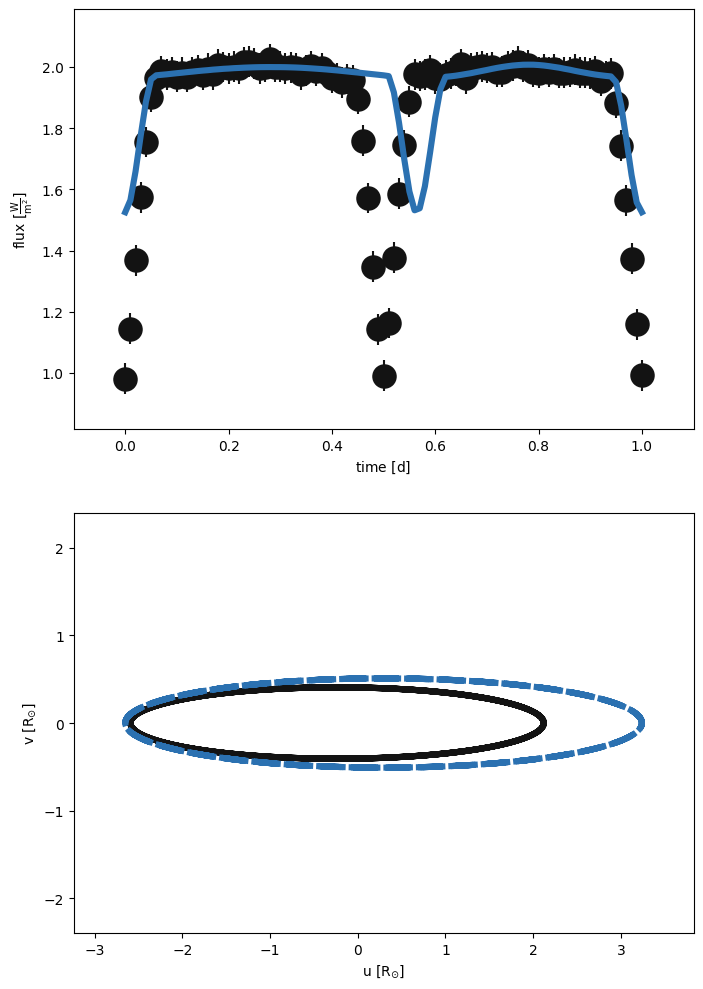

(<autofig.figure.Figure | 2 axes | 4 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [7]:
bSystem.plot(show=True)

Calling to plot returns both an autofig and a matplotlib fig. This can be useful if you wish to edit the plot further before saving it.

It is easy to plot from one dataset by filtering it out before calling plot.

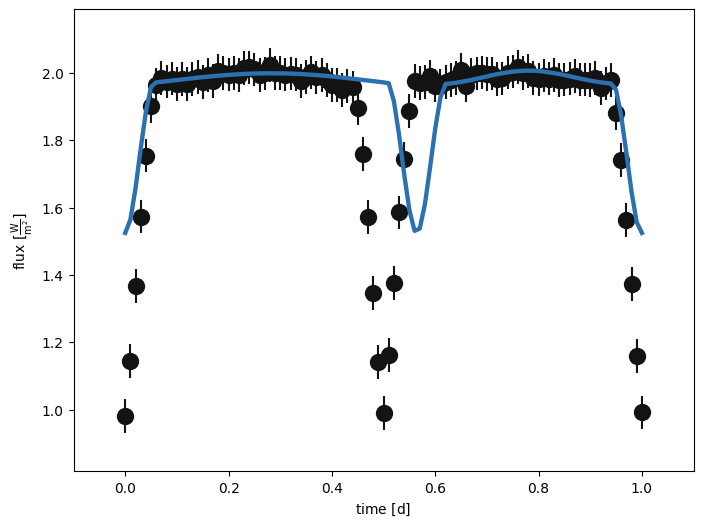

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [8]:
bSystem['lc01'].plot(show=True)

### Selecting Arrays

You can select which arrays to plot by specifying the `x` and `y` components. This also works for `z` if it is a 3D figure.

This can be checked by calling `bSystem.qualifiers`.

Tue, 15 Jul 2025 14:28 matplotlib.axes._base WARNING Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


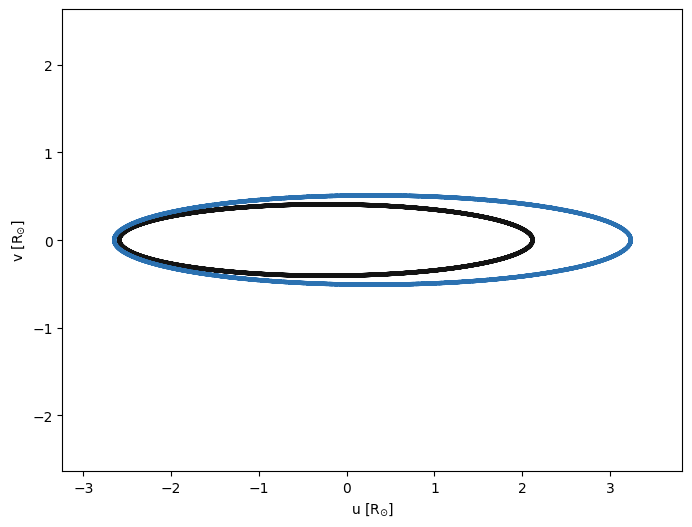

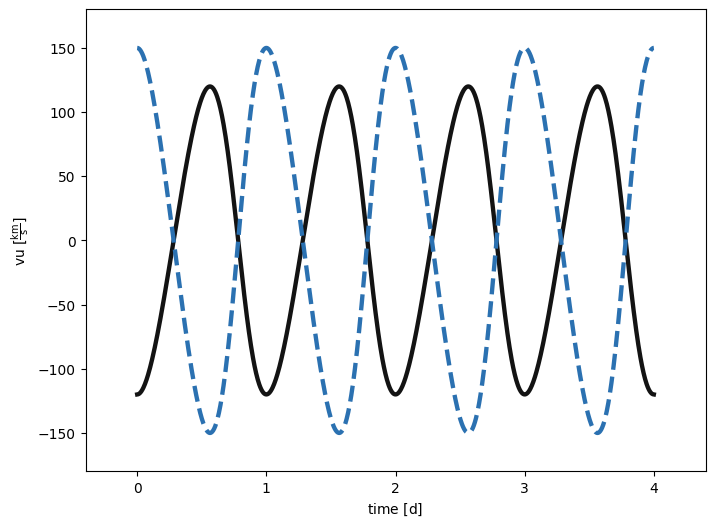

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [9]:
bSystem['orb01'].plot(show=True)
bSystem['orb01'].plot(x='times', y='vus', show=True)

This is important when wanting to plot with phase.

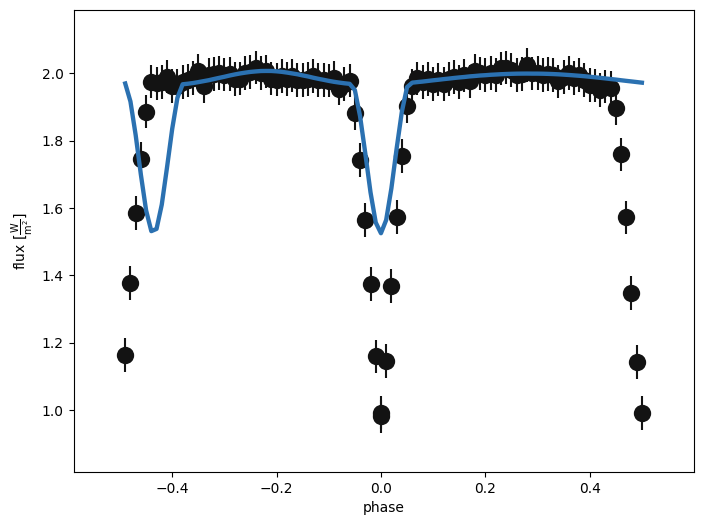

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [10]:
bSystem['lc01'].plot(x='phases', show=True)

### Plotting Customisation

Plotting customisation is discussed in https://phoebe-project.org/docs/2.4/tutorials/plotting_advanced.